In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt

theta = 5
ma = np.random.uniform(theta, 2 * theta, 100)
ma.sort()

print(ma)

[5.04310327 5.12832464 5.14738091 5.17177465 5.21864711 5.23385881
 5.27446948 5.30382237 5.35873339 5.36365612 5.4427522  5.44390345
 5.49719421 5.50238819 5.51433288 5.5321141  5.57063917 5.68695989
 5.70656679 5.77341896 5.93497587 6.06217006 6.08407002 6.13427544
 6.17042177 6.17963487 6.20866142 6.2359868  6.26547658 6.34145002
 6.34433812 6.3875206  6.4678444  6.48986743 6.52707613 6.67514543
 6.74677706 6.74745545 6.75070888 6.78749303 6.83345951 6.91416604
 6.94438205 6.96705046 7.0694125  7.07484293 7.201586   7.20689593
 7.25647648 7.32043354 7.3897418  7.39193382 7.46390218 7.54033127
 7.62726289 7.69810234 7.72372701 7.80119712 7.87199936 7.87246691
 7.88455779 7.89075485 7.97864383 8.05754616 8.08473019 8.09783384
 8.13813596 8.17910143 8.18374147 8.22429239 8.3941211  8.40006552
 8.54103003 8.57866953 8.63856032 8.65665237 8.67897523 8.69928215
 8.71537094 8.78222652 8.78436816 8.78624871 8.82755273 8.8459448
 8.88859736 8.93032541 8.9512678  8.96825574 9.10086171 9.12261

In [7]:
theta_with_wave = 2 / 3 * (np.sum(ma) / 100)
print(theta_with_wave)


4.896199010488506


In [18]:
# Точный доверительный интервал

ex_left_border = np.max(ma) / (0.975 ** 0.01 + 1)
ex_right_border = np.max(ma) / (0.025 ** 0.01 + 1)

print("theta = ", theta)
print(ex_left_border, " < theta < ", ex_right_border)
print("Размах = ", ex_right_border - ex_left_border)

theta =  5
4.986209160292551  < theta <  5.077523596504914
Размах =  0.09131443621236279


In [19]:
# Асимптотический доверительный интервал
ma2 = ma ** 2

as_left_border = -1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(ma2) - (0.01 * np.sum(ma)) ** 2) + theta_with_wave
as_right_border = 1.96 * (2 / 3) / 10 * np.sqrt(0.01 * np.sum(ma2) - (0.01 * np.sum(ma)) ** 2) + theta_with_wave

print("theta = ", theta)
print(as_left_border, " < theta < ", as_right_border)
print("Размах = ", as_right_border - as_left_border)

theta =  5
4.713314492948655  < theta <  5.079083528028358
Размах =  0.36576903507970293


In [20]:
def bootstrap_non_par(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]


bootstrap_n_p = bootstrap_non_par(ma)

theta_with_wave_for_btstrp_n_p = []
for i in bootstrap_n_p:
  theta_with_wave_for_btstrp_n_p.append((2 / 3) * 0.01 * np.sum(i) - theta_with_wave)

theta_with_wave_for_btstrp_n_p.sort()

quantile_theta_1 = theta_with_wave_for_btstrp_n_p[24]
quantile_theta_2 = theta_with_wave_for_btstrp_n_p[974]

border_theta_1 = min(theta_with_wave - quantile_theta_1, theta_with_wave - quantile_theta_2)
border_theta_2 = max(theta_with_wave - quantile_theta_1, theta_with_wave - quantile_theta_2)

print("theta_with_wave = ", theta_with_wave)
print(border_theta_1, " < ", "theta", " < ", border_theta_2)
print("Размах = ", border_theta_2 - border_theta_1)

theta_with_wave =  4.896199010488506
4.721982625329696  <  theta  <  5.080414014442463
Размах =  0.3584313891127673


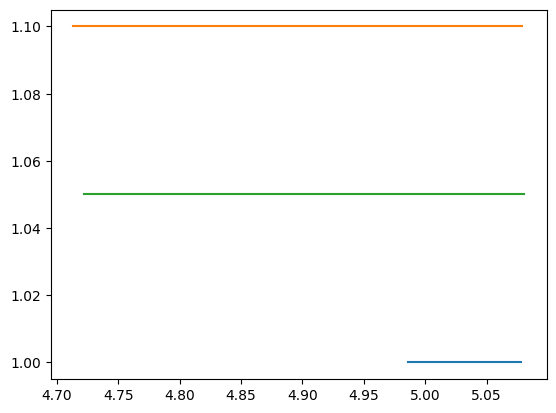

In [21]:
x1 = np.linspace(ex_left_border, ex_right_border, 100)
y1 = [1] * 100

x2 = np.linspace(as_left_border, as_right_border, 100)
y2 = [1.1] * 100

x3 = np.linspace(border_theta_1, border_theta_2, 100)
y3 = [1.05] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)

plt.show()